# Global Data Science Salaries 


Source: https://www.kaggle.com/datasets/dparas01/global-ai-ml-data-science-salary

## Objectives

* To find the relation between the job and salary
* To find the relation between experience level and salary
* To find the correlation between experience level and the type of employment

Firstly, let us import the required files.

In [1]:
import pandas as pd #for data manipulation
import numpy as np #for mathematical calculations
import matplotlib.pyplot as plt #for data visualization (graphs)
%matplotlib inline 
import seaborn as sns #for data visualization

In [2]:
#Reading the data file
df = pd.read_csv(r'C:\Users\USER\Desktop\Data with Mala\salaries.csv')

A quick look to the dataset

In [3]:
df.head() #overlook of the first five records of the dataset

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EX,FT,Data Science Director,212000,USD,212000,US,0,US,M
1,2023,EX,FT,Data Science Director,190000,USD,190000,US,0,US,M
2,2023,MI,FT,Business Intelligence Engineer,35000,GBP,43064,GB,0,GB,M
3,2023,MI,FT,Business Intelligence Engineer,35000,GBP,43064,GB,0,GB,M
4,2023,SE,FT,Machine Learning Engineer,245700,USD,245700,US,0,US,M


In [4]:
df.tail() #overlook of the last five records of the dataset

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
8800,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
8801,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
8802,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
8803,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
8804,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [5]:
#for a specific number of records
df.head(9)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EX,FT,Data Science Director,212000,USD,212000,US,0,US,M
1,2023,EX,FT,Data Science Director,190000,USD,190000,US,0,US,M
2,2023,MI,FT,Business Intelligence Engineer,35000,GBP,43064,GB,0,GB,M
3,2023,MI,FT,Business Intelligence Engineer,35000,GBP,43064,GB,0,GB,M
4,2023,SE,FT,Machine Learning Engineer,245700,USD,245700,US,0,US,M
5,2023,SE,FT,Machine Learning Engineer,132300,USD,132300,US,0,US,M
6,2023,MI,FT,Data Specialist,90000,USD,90000,US,0,US,M
7,2023,MI,FT,Data Specialist,80000,USD,80000,US,0,US,M
8,2023,SE,FT,Machine Learning Engineer,212000,USD,212000,US,0,US,M


Printing complete info and the summary statistics


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8805 entries, 0 to 8804
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           8805 non-null   int64 
 1   experience_level    8805 non-null   object
 2   employment_type     8805 non-null   object
 3   job_title           8805 non-null   object
 4   salary              8805 non-null   int64 
 5   salary_currency     8805 non-null   object
 6   salary_in_usd       8805 non-null   int64 
 7   employee_residence  8805 non-null   object
 8   remote_ratio        8805 non-null   int64 
 9   company_location    8805 non-null   object
 10  company_size        8805 non-null   object
dtypes: int64(4), object(7)
memory usage: 756.8+ KB


In [7]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,8805.000000,8.805000e+03,8805.000000,8805.000000
mean,2022.737422,1.747287e+05,149488.265645,38.693924
std,0.542484,4.560690e+05,64222.105058,48.068060
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.055000e+05,105000.000000,0.000000
50%,2023.000000,1.441000e+05,142200.000000,0.000000
75%,2023.000000,1.900000e+05,185900.000000,100.000000
max,2023.000000,3.040000e+07,615201.000000,100.000000


In [8]:
#Inspect missing values in data set
print(df.isnull().values.sum())


0


In [9]:
dfr = df.copy()

In [10]:
 # Replace '_' with space in column names and title case them
dfr.columns = dfr.columns.str.replace('_', ' ').str.title()

In [11]:
dfr.head()

,Work Year,Experience Level,Employment Type,Job Title,Salary,Salary Currency,Salary In Usd,Employee Residence,Remote Ratio,Company Location,Company Size
0,2023,EX,FT,Data Science Director,212000,USD,212000,US,0,US,M
1,2023,EX,FT,Data Science Director,190000,USD,190000,US,0,US,M
2,2023,MI,FT,Business Intelligence Engineer,35000,GBP,43064,GB,0,GB,M
3,2023,MI,FT,Business Intelligence Engineer,35000,GBP,43064,GB,0,GB,M
4,2023,SE,FT,Machine Learning Engineer,245700,USD,245700,US,0,US,M


In [12]:
dfr['Experience Level'] = dfr['Experience Level'].replace({
    'SE': 'Senior',
    'EN': 'Entry level',
    'EX': 'Executive level',
    'MI': 'Mid/Intermediate level',
})

dfr['Employment Type'] = dfr['Employment Type'].replace({
    'FL': 'Freelancer',
    'CT': 'Contractor',
    'FT' : 'Full-time',
    'PT' : 'Part-time'
})

dfr['Company Size'] = dfr['Company Size'].replace({
    'S': 'SMALL',
    'M': 'MEDIUM',
    'L' : 'LARGE',
})

dfr['Remote Ratio'] = dfr['Remote Ratio'].astype(str)
dfr['Remote Ratio'] = dfr['Remote Ratio'].replace({
    '0': 'On-Site',
    '50': 'Half-Remote',
    '100' : 'Full-Remote',
})

The dataset seems to have no missing values, so we are good to go for our EDA cycle

#### Plotting a histogram

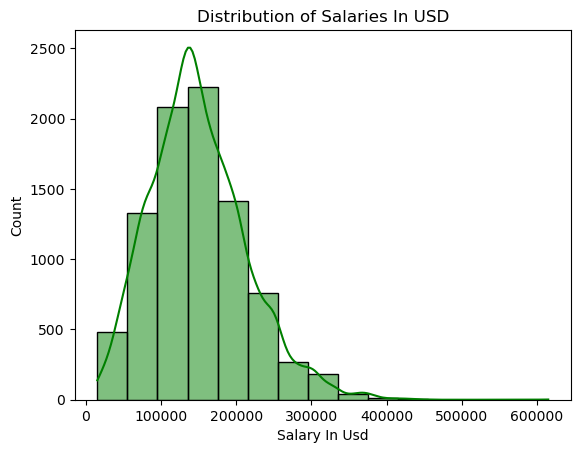

In [13]:
sns.histplot(dfr['Salary In Usd'], bins=15, kde=True, color ="green")

plt.title("Distribution of Salaries In USD")
plt.show()

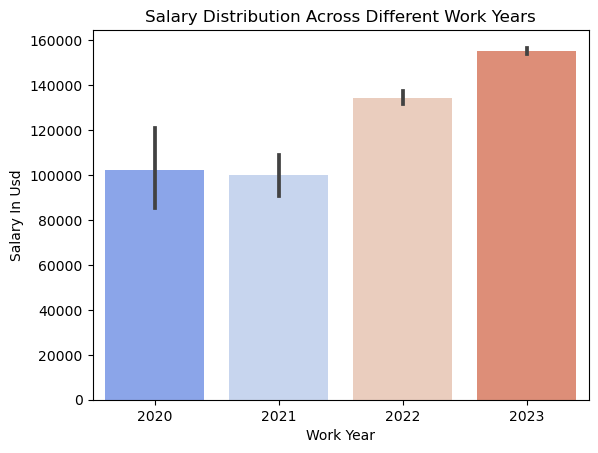

In [28]:

sns.barplot(data=dfr, x='Work Year', y='Salary In Usd', palette='coolwarm')

# Customize the plot
plt.title('Salary Distribution Across Different Work Years')
plt.xlabel('Work Year')
plt.ylabel('Salary In Usd')

# Show the plot
plt.show()


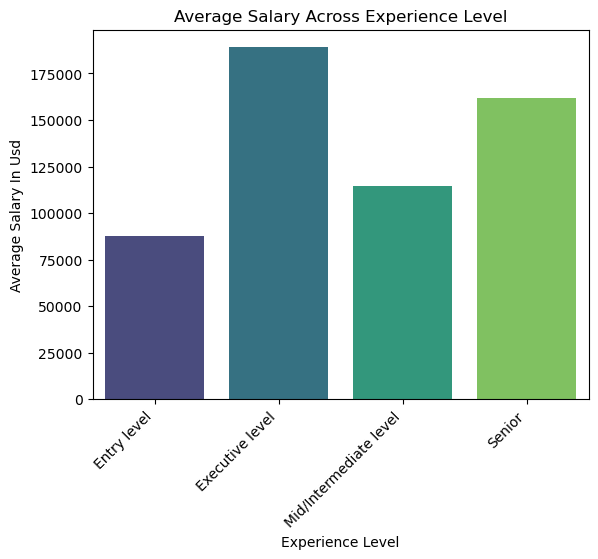

In [29]:

avg_salary_by_experience = dfr.groupby('Experience Level')['Salary In Usd'].mean().reset_index()

sns.barplot(x='Experience Level', y='Salary In Usd', data=avg_salary_by_experience, palette='viridis')

plt.title('Average Salary Across Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary In Usd')
plt.xticks(rotation=45, ha='right')  

plt.show()

<Axes: title={'center': ' Average Salary vs Experience Level'}, xlabel='Experience Level', ylabel='Salary In Usd'>

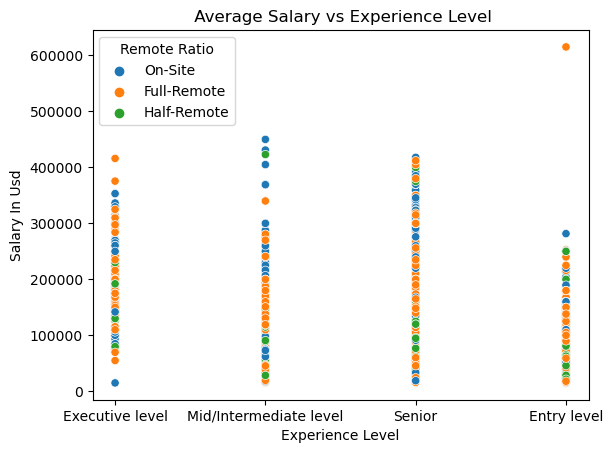

In [16]:
plt.title(" Average Salary vs Experience Level")
sns.scatterplot(y='Salary In Usd', x='Experience Level', hue='Remote Ratio', data=dfr)

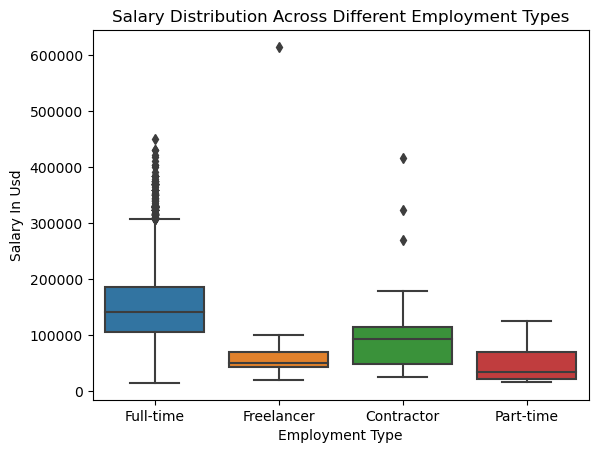

In [17]:
sns.boxplot(data=dfr, x='Employment Type', y='Salary In Usd')
plt.title('Salary Distribution Across Different Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Salary In Usd')
plt.show()

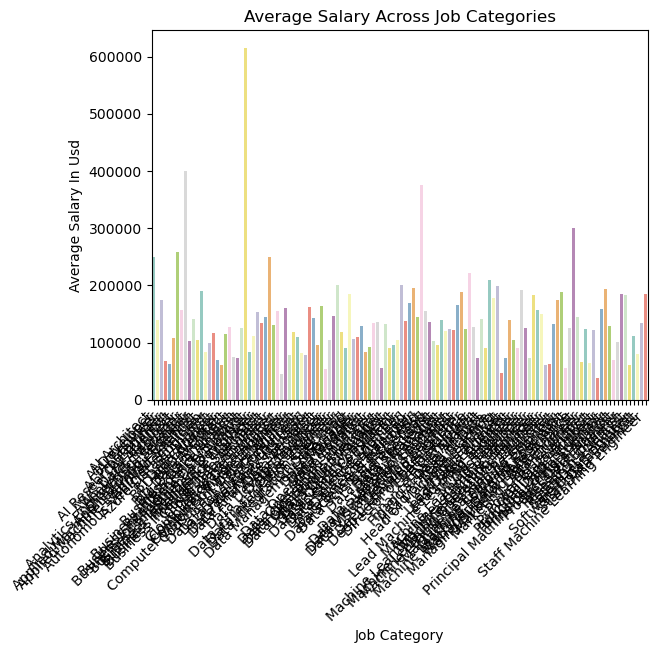

In [18]:
avg_salary_by_category = dfr.groupby('Job Title')['Salary In Usd'].mean().reset_index()

sns.barplot(x='Job Title', y='Salary In Usd', data=avg_salary_by_category, palette='Set3')

plt.title('Average Salary Across Job Categories')
plt.xlabel('Job Category')
plt.ylabel('Average Salary In Usd')
plt.xticks(rotation=45, ha='right')  

plt.show()

<Axes: title={'center': ' Experience level vs Salary In Usd on Remote Ratio'}, xlabel='Salary In Usd', ylabel='Experience Level'>

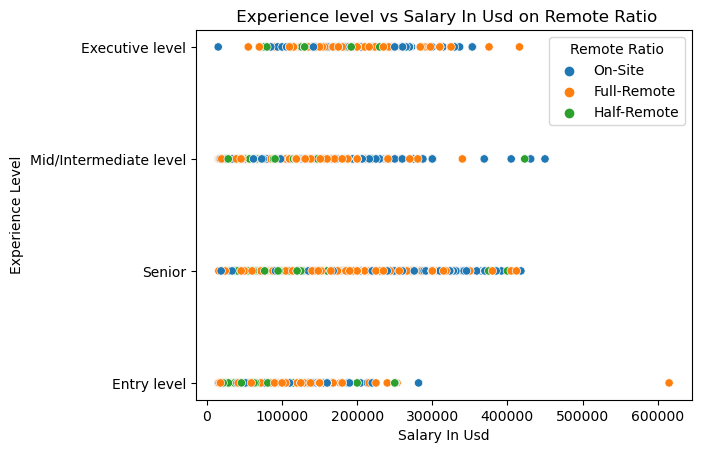

In [19]:
plt.title(" Experience level vs Salary In Usd on Remote Ratio")
sns.scatterplot(y='Experience Level', x='Salary In Usd', hue='Remote Ratio', data=dfr)

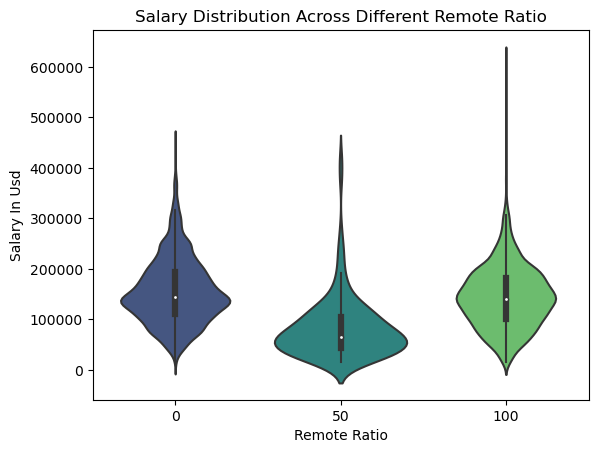

In [21]:
sns.violinplot(data=df, x='remote_ratio', y='salary_in_usd', palette='viridis')
plt.title('Salary Distribution Across Different Remote Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary In Usd')
plt.show()

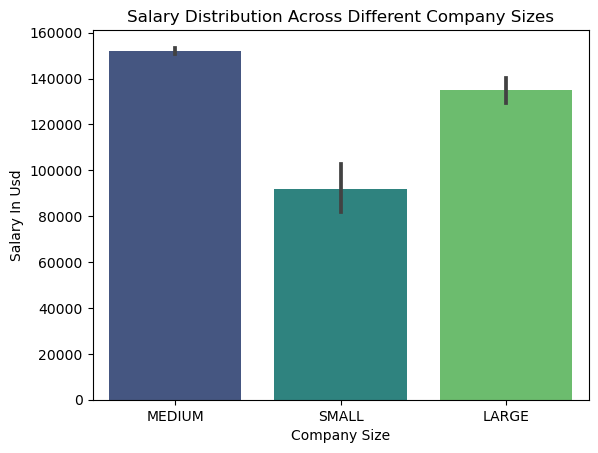

In [24]:
sns.barplot(data=dfr, x='Company Size', y='Salary In Usd', palette='viridis')


plt.title('Salary Distribution Across Different Company Sizes')
plt.xlabel('Company Size')
plt.ylabel('Salary In Usd')

plt.show()

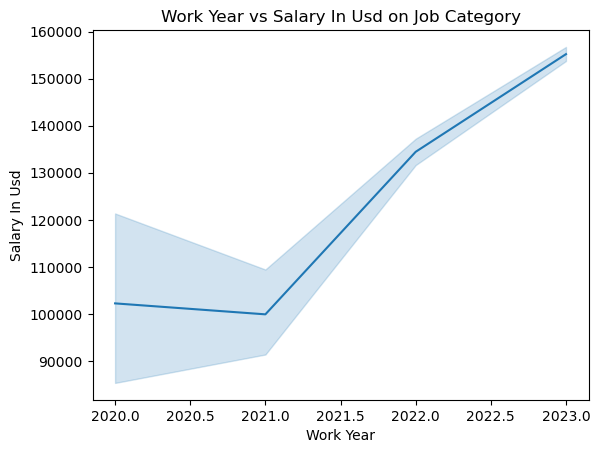

In [31]:
plt.title("Work Year vs Salary In Usd on Job Category")
sns.lineplot(x='Work Year', y='Salary In Usd', data=dfr)

plt.show()

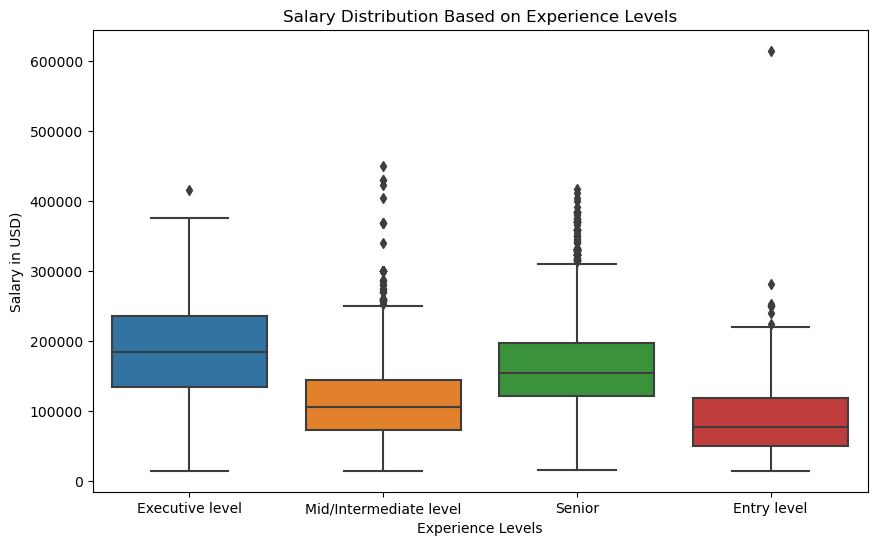

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Experience Level', y='Salary In Usd', data=dfr)
plt.title('Salary Distribution Based on Experience Levels')
plt.xlabel('Experience Levels')
plt.ylabel('Salary in USD)')
plt.xticks(rotation=0)
plt.show()

## Takeaways

*  Full time Employees have maximum salaries in  the field of Data Science
* The data science jobs were paid the highest on the year 2023
* The executive level are provided with more average salary.